In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
member = pd.read_csv('./promotion/member.csv')
transaction = pd.read_csv('./promotion/transaction.csv')

In [3]:
member.head()

,id,recency,zip_code,is_referral,channel,conversion
0,906145,10,Surburban,0,Phone,0
1,184478,6,Rural,1,Web,0
2,394235,7,Surburban,1,Web,0
3,130152,9,Rural,1,Web,0
4,940352,2,Urban,0,Web,0


In [4]:
transaction.head()

,id,num_item,total_amount
0,906145,5,34000
1,906145,1,27000
2,906145,4,33000
3,184478,4,29000
4,394235,4,33000


In [5]:
member['zip_code'].unique()

array(['Surburban', 'Rural', 'Urban'], dtype=object)

In [6]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 6 columns):
id             64000 non-null int64
recency        64000 non-null int64
zip_code       64000 non-null object
is_referral    64000 non-null int64
channel        64000 non-null object
conversion     64000 non-null int64
dtypes: int64(4), object(2)
memory usage: 2.9+ MB


In [7]:
member.describe()

,id,recency,is_referral,conversion
count,64000.000000,64000.000000,64000.000000,64000.000000
mean,550694.137797,5.763734,0.502250,0.146781
std,259105.689773,3.507592,0.499999,0.353890
min,100001.000000,1.000000,0.000000,0.000000
25%,326772.000000,2.000000,0.000000,0.000000
50%,551300.000000,6.000000,1.000000,0.000000
75%,774914.500000,9.000000,1.000000,0.000000
max,999997.000000,12.000000,1.000000,1.000000


In [8]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196836 entries, 0 to 196835
Data columns (total 3 columns):
id              196836 non-null int64
num_item        196836 non-null int64
total_amount    196836 non-null int64
dtypes: int64(3)
memory usage: 4.5 MB


/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='conversion', ylabel='Density'>

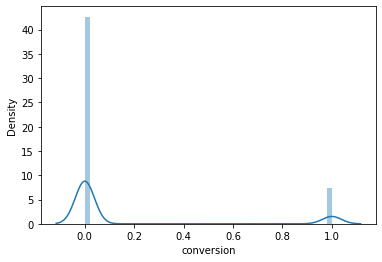

In [9]:
sns.distplot(member['conversion'])

<AxesSubplot:xlabel='conversion', ylabel='recency'>

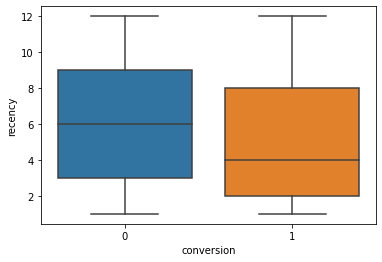

In [10]:
sns.boxplot(x='conversion', y='recency', data=member)

<AxesSubplot:xlabel='conversion', ylabel='Count'>

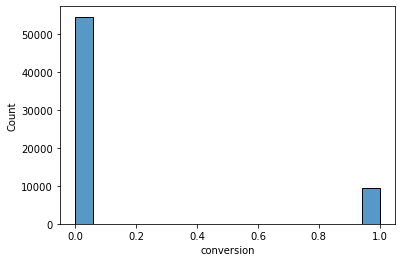

In [11]:
sns.histplot(x='conversion', data=member)

In [12]:
transaction.head()

,id,num_item,total_amount
0,906145,5,34000
1,906145,1,27000
2,906145,4,33000
3,184478,4,29000
4,394235,4,33000


In [13]:
transaction['price'] = transaction['total_amount']/transaction['num_item']
transaction.head()

,id,num_item,total_amount,price
0,906145,5,34000,6800.0
1,906145,1,27000,27000.0
2,906145,4,33000,8250.0
3,184478,4,29000,7250.0
4,394235,4,33000,8250.0


In [14]:
transaction_mean = transaction.groupby('id').mean()

In [15]:
transaction_cnt = transaction['id'].value_counts()
transaction_cnt

446874    5
473857    5
384266    5
648461    5
130318    5
         ..
674652    1
670546    1
192229    1
720615    1
789077    1
Name: id, Length: 64000, dtype: int64

In [16]:
trans_df = pd.concat([transaction_mean, transaction_cnt], axis=1)
trans_df

,num_item,total_amount,price,id
100001,3.500000,26000.000000,7500.000000,2
100008,5.000000,26000.000000,5200.000000,1
100032,2.666667,20666.666667,9366.666667,3
100036,3.000000,25800.000000,13273.333333,5
100070,3.250000,21250.000000,8537.500000,4
...,...,...,...,...
999932,5.000000,32000.000000,6400.000000,1
999981,2.000000,22750.000000,12875.000000,4
999990,3.000000,28000.000000,10388.888889,3
999995,2.000000,27000.000000,13500.000000,1


In [17]:
trans_df.columns = ['num_item_mean', 'total_amount_mean', 'price', 'count']
trans_df

,num_item_mean,total_amount_mean,price,count
100001,3.500000,26000.000000,7500.000000,2
100008,5.000000,26000.000000,5200.000000,1
100032,2.666667,20666.666667,9366.666667,3
100036,3.000000,25800.000000,13273.333333,5
100070,3.250000,21250.000000,8537.500000,4
...,...,...,...,...
999932,5.000000,32000.000000,6400.000000,1
999981,2.000000,22750.000000,12875.000000,4
999990,3.000000,28000.000000,10388.888889,3
999995,2.000000,27000.000000,13500.000000,1


In [18]:
member.set_index('id', inplace=True)

In [19]:
member

,recency,zip_code,is_referral,channel,conversion
id,,,,,
906145,10,Surburban,0,Phone,0
184478,6,Rural,1,Web,0
394235,7,Surburban,1,Web,0
130152,9,Rural,1,Web,0
940352,2,Urban,0,Web,0
...,...,...,...,...,...
838295,10,Urban,0,Web,0
547316,5,Urban,1,Phone,0
131575,6,Urban,1,Phone,0


In [20]:
df = member.join(trans_df)
df

,recency,zip_code,is_referral,channel,conversion,num_item_mean,total_amount_mean,price,count
id,,,,,,,,,
906145,10,Surburban,0,Phone,0,3.333333,31333.333333,14016.666667,3
184478,6,Rural,1,Web,0,4.000000,29000.000000,7250.000000,1
394235,7,Surburban,1,Web,0,4.000000,20500.000000,5125.000000,2
130152,9,Rural,1,Web,0,1.750000,20750.000000,14875.000000,4
940352,2,Urban,0,Web,0,3.000000,31000.000000,10333.333333,1
...,...,...,...,...,...,...,...,...,...
838295,10,Urban,0,Web,0,3.500000,26000.000000,8012.500000,4
547316,5,Urban,1,Phone,0,1.800000,17800.000000,11300.000000,5
131575,6,Urban,1,Phone,0,4.000000,30500.000000,7833.333333,2


In [21]:
df.isna().sum()

recency              0
zip_code             0
is_referral          0
channel              0
conversion           0
num_item_mean        0
total_amount_mean    0
price                0
count                0
dtype: int64

In [22]:
df['zip_code'].nunique()

3

In [23]:
df['channel'].unique()

array(['Phone', 'Web', 'Multichannel'], dtype=object)

In [24]:
df = pd.get_dummies(df, columns=['zip_code', 'channel'], drop_first=True)
df

,recency,is_referral,conversion,num_item_mean,total_amount_mean,price,count,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
id,,,,,,,,,,,
906145,10,0,0,3.333333,31333.333333,14016.666667,3,1,0,1,0
184478,6,1,0,4.000000,29000.000000,7250.000000,1,0,0,0,1
394235,7,1,0,4.000000,20500.000000,5125.000000,2,1,0,0,1
130152,9,1,0,1.750000,20750.000000,14875.000000,4,0,0,0,1
940352,2,0,0,3.000000,31000.000000,10333.333333,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
838295,10,0,0,3.500000,26000.000000,8012.500000,4,0,1,0,1
547316,5,1,0,1.800000,17800.000000,11300.000000,5,0,1,1,0
131575,6,1,0,4.000000,30500.000000,7833.333333,2,0,1,1,0


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('conversion', axis=1), df['conversion'],
                                                   test_size=0.2, random_state=42)

In [26]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=10, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [27]:
pred = model.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test, pred)

0.871875

In [29]:
confusion_matrix(y_test, pred)

array([[10902,    37],
       [ 1603,   258]])

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     10939
           1       0.87      0.14      0.24      1861

    accuracy                           0.87     12800
   macro avg       0.87      0.57      0.58     12800
weighted avg       0.87      0.87      0.83     12800



In [31]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=10, random_state=42)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

In [32]:
pd.DataFrame(pred)

,0
0,0.084317
1,0.335259
2,0.267317
3,0.421147
4,0.280098
...,...
12795,0.112257
12796,0.088758
12797,0.000000
12798,0.152442


In [33]:
def convert(x):
    if x > 0.5:
        return 1
    else:
        return 0
    
pd_result = pd.Series(pred).apply(lambda x: convert(x))
pd_result

0        0
1        0
2        0
3        0
4        0
        ..
12795    0
12796    0
12797    0
12798    0
12799    0
Length: 12800, dtype: int64

In [34]:
accuracy_score(y_test, pd_result.to_numpy())

0.87875

In [35]:
pd_result = pd.Series(pred).apply(lambda x: 1 if x > 0.3 else 0)


In [36]:
accuracy_score(y_test, pd_result.to_numpy())

0.86734375

In [37]:
print(classification_report(y_test, pd_result.to_numpy()))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93     10939
           1       0.58      0.33      0.42      1861

    accuracy                           0.87     12800
   macro avg       0.74      0.64      0.67     12800
weighted avg       0.85      0.87      0.85     12800



과제 
1. RandomForest 파라미터 조정
2. StratifiedKFold 적용
3. XGBoost
4. Cost-sensitive learning 적용 (https://dining-developer.tistory.com/27)

# 1. Random Forest 파라미터 조정

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[50, 100, 150],
    'criterion':['gini', 'entropy'],
    'max_depth':[6, 8, 10, 12],
    'min_samples_leaf':[8, 12, 18],
    'min_samples_split':[8, 16, 20]
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

In [39]:
pred = grid_cv.best_estimator_.predict(X_test)
accuracy_score(y_test, pred)

0.87265625

In [98]:
grid_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'min_samples_leaf': 8,
 'min_samples_split': 20,
 'n_estimators': 50}

In [53]:
rf_cfm = confusion_matrix(y_test, pred)
rf_cfm

array([[10879,    60],
       [ 1570,   291]])

In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     10939
           1       0.83      0.16      0.26      1861

    accuracy                           0.87     12800
   macro avg       0.85      0.58      0.60     12800
weighted avg       0.87      0.87      0.83     12800



# 2. StratifiedKFold 적용

In [40]:
from sklearn.model_selection import StratifiedKFold

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv_skf = GridSearchCV(rf_clf, param_grid=params,
                              cv=StratifiedKFold(n_splits=5),
                              n_jobs=-1)
grid_cv_skf.fit(X_train, y_train)
pred_skf = grid_cv_skf.best_estimator_.predict(X_test)
accuracy_score(y_test, pred_skf)

0.873515625

In [54]:
rf_skf_cfm = confusion_matrix(y_test, pred_skf)
rf_skf_cfm

array([[10881,    58],
       [ 1561,   300]])

In [114]:
print(classification_report(y_test, pred_skf))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     10939
           1       0.84      0.16      0.27      1861

    accuracy                           0.87     12800
   macro avg       0.86      0.58      0.60     12800
weighted avg       0.87      0.87      0.83     12800



# 3. XGBoost

In [47]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]

xgb_clf.fit(X_train, y_train, early_stopping_rounds=400, eval_set=evals,
           eval_metric="logloss", verbose=True)

xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_accuracy

[0]	validation_0-logloss:0.64053
[1]	validation_0-logloss:0.59756
[2]	validation_0-logloss:0.56163
[3]	validation_0-logloss:0.53150
[4]	validation_0-logloss:0.50620
[5]	validation_0-logloss:0.48457
[6]	validation_0-logloss:0.46616
[7]	validation_0-logloss:0.45050
[8]	validation_0-logloss:0.43694
[9]	validation_0-logloss:0.42528
[10]	validation_0-logloss:0.41516
[11]	validation_0-logloss:0.40642
[12]	validation_0-logloss:0.39867
[13]	validation_0-logloss:0.39195
[14]	validation_0-logloss:0.38618
[15]	validation_0-logloss:0.38111
[16]	validation_0-logloss:0.37652
[17]	validation_0-logloss:0.37260
[18]	validation_0-logloss:0.36902
[19]	validation_0-logloss:0.36589
[20]	validation_0-logloss:0.36306
[21]	validation_0-logloss:0.36075
[22]	validation_0-logloss:0.35853
[23]	validation_0-logloss:0.35679
[24]	validation_0-logloss:0.35499
[25]	validation_0-logloss:0.35348
[26]	validation_0-logloss:0.35218
[27]	validation_0-logloss:0.35069
[28]	validation_0-logloss:0.34940
[29]	validation_0-loglos

[238]	validation_0-logloss:0.32124
[239]	validation_0-logloss:0.32115
[240]	validation_0-logloss:0.32110
[241]	validation_0-logloss:0.32107
[242]	validation_0-logloss:0.32106
[243]	validation_0-logloss:0.32105
[244]	validation_0-logloss:0.32103
[245]	validation_0-logloss:0.32102
[246]	validation_0-logloss:0.32099
[247]	validation_0-logloss:0.32100
[248]	validation_0-logloss:0.32099
[249]	validation_0-logloss:0.32090
[250]	validation_0-logloss:0.32080
[251]	validation_0-logloss:0.32080
[252]	validation_0-logloss:0.32079
[253]	validation_0-logloss:0.32079
[254]	validation_0-logloss:0.32068
[255]	validation_0-logloss:0.32064
[256]	validation_0-logloss:0.32063
[257]	validation_0-logloss:0.32062
[258]	validation_0-logloss:0.32064
[259]	validation_0-logloss:0.32065
[260]	validation_0-logloss:0.32066
[261]	validation_0-logloss:0.32065
[262]	validation_0-logloss:0.32062
[263]	validation_0-logloss:0.32056
[264]	validation_0-logloss:0.32056
[265]	validation_0-logloss:0.32054
[266]	validation_0-l

0.8803125

In [49]:
xgb_accuracy

0.8803125

In [66]:
xgb_cfm = confusion_matrix(y_test, xgb_pred)
xgb_cfm

array([[10848,    91],
       [ 1441,   420]])

In [115]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     10939
           1       0.82      0.23      0.35      1861

    accuracy                           0.88     12800
   macro avg       0.85      0.61      0.64     12800
weighted avg       0.87      0.88      0.85     12800



# 4. Cost-sensitive learning

### Weight 1
from `y_test`

In [71]:
weight1 = {0: y_test.value_counts()[1]/y_test.value_counts()[0],
          1: y_test.value_counts()[0]/y_test.value_counts()[1]}
weight1

{0: 0.17012523996709022, 1: 5.878022568511553}

### Weight 2
from confusion matrix
- 1을 더 잘 맞추도록
- 0은 덜 신경쓰도록

In [59]:
total_cfm = rf_cfm + rf_skf_cfm + xgb_cfm
total_cfm

array([[32608,   209],
       [ 4572,  1011]])

In [61]:
t_tn, t_fp, t_fn, t_tp = total_cfm.ravel()

In [72]:
t_tn, t_fp, t_fn, t_tp

(32608, 209, 4572, 1011)

In [73]:
weight2 = {0: t_fp/t_fn,
          1: t_fn/t_fp}
weight2

{0: 0.045713035870516186, 1: 21.875598086124402}

### Weight3
weight1 + weight2

In [82]:
weight3 = {i: v1+v2 for i, (v1,v2) in enumerate(zip(weight1.values(), weight2.values()))}
weight3

{0: 0.2158382758376064, 1: 27.753620654635956}

### Weight4
weight1 * weight2

In [83]:
weight4 = {i: v1*v2 for i, (v1,v2) in enumerate(zip(weight1.values(), weight2.values()))}
weight4

{0: 0.007776941197095769, 1: 128.58525924992736}

In [88]:
weights = [weight1, weight2, weight3, weight4]

### RandomForest GridSearch + weights

In [93]:
#from sklearn.model_selection import StratifiedKFold

params = {
    'n_estimators':[50, 100, 150],
    'criterion':['gini', 'entropy'],
    'max_depth':[6, 8, 10, 12],
    'min_samples_leaf':[8, 12, 18],
    'min_samples_split':[8, 16, 20],
    'class_weight':weights
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv_skf_w = GridSearchCV(rf_clf, param_grid=params,
                              cv=StratifiedKFold(n_splits=5),
                              n_jobs=-1)
grid_cv_skf_w.fit(X_train, y_train)
pred_skf_w = grid_cv_skf_w.best_estimator_.predict(X_test)
accuracy_score(y_test, pred_skf_w)

0.374921875

In [95]:
grid_cv_skf_w.best_params_

{'class_weight': {0: 0.17012523996709022, 1: 5.878022568511553},
 'criterion': 'gini',
 'max_depth': 12,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 100}

In [94]:
rf_skf_w_cfm = confusion_matrix(y_test, pred_skf_w)
rf_skf_w_cfm

array([[2975, 7964],
       [  37, 1824]])

In [116]:
print(classification_report(y_test, pred_skf_w))

              precision    recall  f1-score   support

           0       0.99      0.27      0.43     10939
           1       0.19      0.98      0.31      1861

    accuracy                           0.37     12800
   macro avg       0.59      0.63      0.37     12800
weighted avg       0.87      0.37      0.41     12800



### 2차

In [102]:
#from sklearn.model_selection import StratifiedKFold

params = {
    'n_estimators':[50, 100, 150],
    'criterion':['gini', 'entropy'],
    'max_depth':[6, 8, 10, 12],
    'min_samples_leaf':[8, 12, 18],
    'min_samples_split':[8, 16, 20],
    'class_weight':[{0:1, 1:5},
                   {0:1, 1:10},
                   {0:1, 1:15}]
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv_skf_w2 = GridSearchCV(rf_clf, param_grid=params,
                              cv=StratifiedKFold(n_splits=5),
                              n_jobs=-1)
grid_cv_skf_w2.fit(X_train, y_train)
pred_skf_w2 = grid_cv_skf_w2.best_estimator_.predict(X_test)
accuracy_score(y_test, pred_skf_w2)

0.794375

In [104]:
grid_cv_skf_w2.best_params_

{'class_weight': {0: 1, 1: 5},
 'criterion': 'gini',
 'max_depth': 12,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 150}

In [105]:
rf_skf_w_cfm2 = confusion_matrix(y_test, pred_skf_w2)
rf_skf_w_cfm2

array([[9186, 1753],
       [ 879,  982]])

In [118]:
print(classification_report(y_test, pred_skf_w2))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87     10939
           1       0.36      0.53      0.43      1861

    accuracy                           0.79     12800
   macro avg       0.64      0.68      0.65     12800
weighted avg       0.83      0.79      0.81     12800



### 3차

In [106]:
#from sklearn.model_selection import StratifiedKFold

params = {
    'n_estimators':[50, 100, 150],
    'criterion':['gini', 'entropy'],
    'max_depth':[6, 8, 10, 12],
    'min_samples_leaf':[8, 12, 18],
    'min_samples_split':[8, 16, 20],
    'class_weight':[{0:1, 1:1.5},
                   {0:1, 1:3},
                   {0:1, 1:4.5}]
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv_skf_w3 = GridSearchCV(rf_clf, param_grid=params,
                              cv=StratifiedKFold(n_splits=5),
                              n_jobs=-1)
grid_cv_skf_w3.fit(X_train, y_train)
pred_skf_w3 = grid_cv_skf_w3.best_estimator_.predict(X_test)
accuracy_score(y_test, pred_skf_w3)

0.875859375

In [111]:
grid_cv_skf_w3.best_params_

{'class_weight': {0: 1, 1: 1.5},
 'criterion': 'gini',
 'max_depth': 12,
 'min_samples_leaf': 8,
 'min_samples_split': 20,
 'n_estimators': 100}

In [107]:
rf_skf_w_cfm3 = confusion_matrix(y_test, pred_skf_w3)
rf_skf_w_cfm3

array([[10784,   155],
       [ 1434,   427]])

In [108]:
rf_cfm

array([[10879,    60],
       [ 1570,   291]])

In [119]:
print(classification_report(y_test, pred_skf_w3))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     10939
           1       0.73      0.23      0.35      1861

    accuracy                           0.88     12800
   macro avg       0.81      0.61      0.64     12800
weighted avg       0.86      0.88      0.85     12800



# Cost-sensitive learning 적용 결과
> 모델 일반화 성능과 세부 편향성(ex. f1-score) 간의 트레이드 오프 발생